# Segmentation Finale



## Importing the packages

In [3]:
# import the packages
import os
import numpy as np
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
from pathlib import Path

import torch
import torchaudio
import torchvision
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.filters.rank import mean, median
from skimage.filters import gaussian
from skimage.morphology import rectangle, disk


In [4]:
print(torchaudio.list_audio_backends()) 

['soundfile']


In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


## UTILITIES

Section of utilities, any function that might be used multiple times in the notebook will be defined here.

In [6]:
def plot_channels(image, nbr_channels):
    if nbr_channels == 3:
        plt.figure(figsize=[15, 8])
        plt.subplot(4, 2, 1)
        plt.title('first channel')
        plt.hist(image[:, :, 0].flatten(), bins=np.arange(257))
        plt.subplot(4, 2, 2)
        plt.imshow(image[:, :, 0], plt.cm.gray)
        plt.subplot(4, 2, 3)
        plt.title('second channel')
        plt.hist(image[:, :, 1].flatten(), bins=np.arange(257))
        plt.subplot(4, 2, 4)
        plt.imshow(image[:, :, 1], plt.cm.gray)
        plt.subplot(4, 2, 5)
        plt.title('third channel')
        plt.hist(image[:, :, 2].flatten(), bins=np.arange(257))
        plt.subplot(4, 2, 6)
        plt.imshow(image[:, :, 2], plt.cm.gray)
        plt.show()
    elif nbr_channels == 4:
        plt.figure(figsize=[15, 8])
        plt.subplot(4, 2, 1)
        plt.title('first channel')
        plt.hist(image[:, :, 0].flatten(), bins=np.arange(257))
        plt.subplot(4, 2, 2)
        plt.imshow(image[:, :, 0], plt.cm.gray)
        plt.subplot(4, 2, 3)
        plt.title('second channel')
        plt.hist(image[:, :, 1].flatten(), bins=np.arange(257))
        plt.subplot(4, 2, 4)
        plt.imshow(image[:, :, 1], plt.cm.gray)
        plt.subplot(4, 2, 5)
        plt.title('third channel')
        plt.hist(image[:, :, 2].flatten(), bins=np.arange(257))
        plt.subplot(4, 2, 6)
        plt.imshow(image[:, :, 2], plt.cm.gray)
        plt.subplot(4, 2, 7)
        plt.title('fourth channel')
        plt.hist(image[:, :, 3].flatten(), bins=np.arange(257))
        plt.subplot(4, 2, 8)
        plt.imshow(image[:, :, 3], plt.cm.gray)
        plt.show()
    

    plt.show()

In [7]:
def plot_audio(filename):
    waveform, sample_rate = torchaudio.load(filename)

    print("Shape of waveform: {}".format(waveform.size())) ## same as print(f"Shape of waveform: {waveform.size()})
    print("Sample rate of waveform: {}".format(sample_rate))

    ### here we plot the soundwave of the file (same as ploting an image from the mnist
    plt.figure()
    plt.plot(waveform.t().numpy())

    return waveform, sample_rate

Shape of waveform: torch.Size([1, 160000])
Sample rate of waveform: 16000


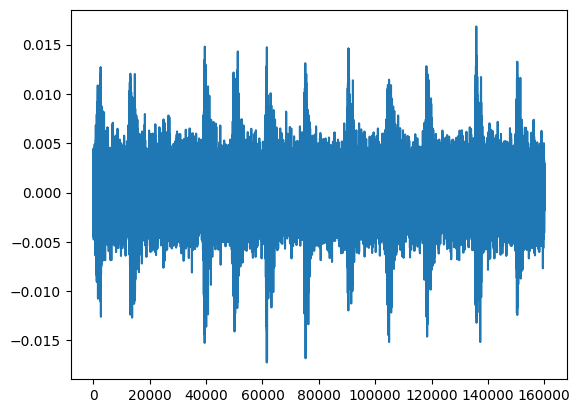

In [9]:
file = "../Data/Original_Data/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090606_050012_0030.wav"
waveform, sample_rate = plot_audio(file)
ipd.Audio(waveform.numpy(), rate=sample_rate)
# print(sample_rate)

## Data Preprocessing

### Generating the spectrograms